Connect to myDrive:

In [9]:
from google.colab import drive
import os
import zipfile
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/Master/2020_fall/Machine_learning/修課 - 吳沛遠/Final Project/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Master/2020_fall/Machine_learning/修課 - 吳沛遠/Final Project


Import packages:

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Exploration Analysis for Data Pre-processing:

Read Training Data  
Data Source: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques  

In [11]:
train = pd.read_csv('train.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [12]:
# train data without NaN
train_wo_nan = train[train.columns[~train.isnull().any()]]
train_wo_nan

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [13]:
type_dct = {str(k): list(v) for k, v in train.groupby(train.dtypes, axis=1)}
type_dct.keys()

dict_keys(['int64', 'float64', 'object'])

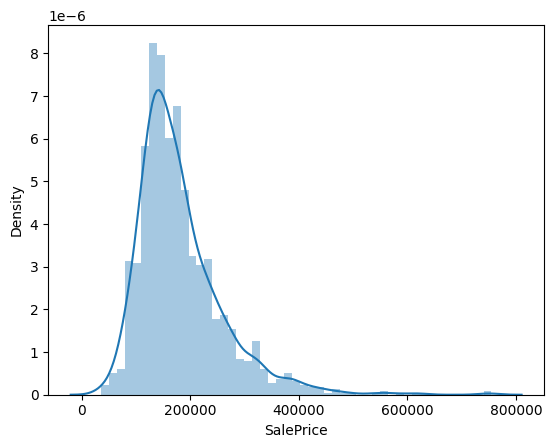

In [14]:
# there is a skewness on the histogram of salesprice, transformation log(x+1) is applied
sns.distplot(train['SalePrice'])
train['SalePrice'] = np.log1p(train['SalePrice'])

In [15]:
## categorical object
for col in train_wo_nan[train_wo_nan.columns[train_wo_nan.dtypes==np.object]].columns.tolist():
    print(train[col].value_counts())
    print("\n")
# "MSZoning": one-hot
# "Street": one-hot
# "LotShape": 1 to 4
# "LandContour": 1 to 4
# "Utilities": 1 to 4
# "LotConfig"; one hot
# "LandSlope": 1 to 3
# "Neighborhood": one hot
# "Condition1", "Condition2": one-hot
# "BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd": one-hot
# "ExterQual": 1 to 5
# "ExterCond": 1 to 5
# "Foundation": one hot
# "Heating": one hot
# "HeatingQC": 1 to 5
# "CentralAir": 0,1
# "KitchenQual": 1 to 5
# "Functional": 1 to 5
# "PavedDrive": 1 to 3
# "SaleType": one hot
# "SaleCondition": one hot

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


Pave    1454
Grvl       6
Name: Street, dtype: int64


Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


Norm      1260
Feedr     

In [16]:
# 補值
train.columns[train.isnull().any()].tolist()
# 'LotFrontage'(conti.): filled up with neighborhood
# 'Alley': NaN filled up with No alley access (a new category), 1 to 3 
# 'MasVnrType': NaN filled up with CBlock, one-hot
# 'MasVnrArea'(conti.): neighborhood 
# 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2': if all these columns are nan, fill up Na (no basement); else, then 1 to (6, 7)
# 'Electrical': one-hot
# 'FireplaceQu': if "Fireplaces"==0 then 'FireplaceQu'='NA'; else, neghborhood. 1 to 6
# 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond': if all these columns are nan, fill up NA (No Garage), and GarageYrBlt==0; GarageYrBlt=max(GarageYrBlt)+1-GarageYrBlt  
# "PoolQC": if "PoolArea"==0, then NA. from 1 to 6
# "Fence": na==1 to 6
# "MiscFeature": turn NA to "None", then one-hot

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

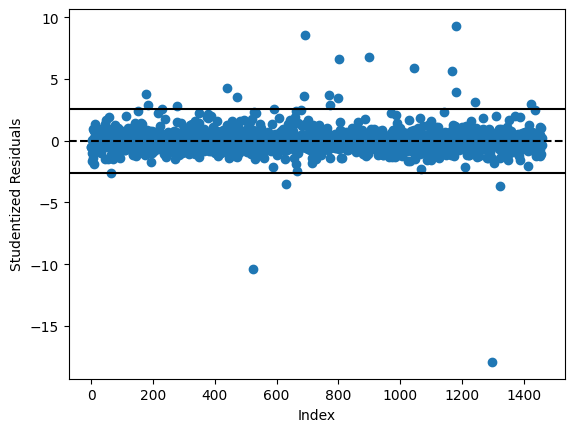

In [17]:
## Removing outlier: remove the points that studentized residuals which is larger than the 0.5%, 99.5% t-dist. quantile 
import statsmodels.api as sm

conti_var = train_wo_nan[train_wo_nan.columns[train_wo_nan.dtypes!=np.object]].columns.tolist()[1:-1]
x = train_wo_nan[conti_var]
x = sm.add_constant(x)
y = train_wo_nan['SalePrice']
model = sm.OLS(y, x).fit() 
# calculate studentized residuals 
stud_res = model.outlier_test() 

# display studentized residuals 
import matplotlib.pyplot as plt 
from scipy.stats import t

# define predictor variable values and studentized residuals 
x = x.index.tolist()
y = stud_res['student_resid']

# create scatterplot of predictor variable vs. studentized residuals
plt.scatter(x, y) 
plt.axhline(y = stats.t(df=len(y)-len(conti_var)-1).ppf((0.005)), color = 'black', linestyle = '-')
plt.axhline(y = stats.t(df=len(y)-len(conti_var)-1).ppf((0.995)), color = 'black', linestyle = '-')
plt.axhline(y = 0, color = 'black', linestyle = '--') 
plt.xlabel('Index') 
plt.ylabel('Studentized Residuals') 


train_wo_out = train[(y<stats.t(df=len(y)-len(conti_var)-1).ppf((0.995))) & (y>stats.t(df=len(y)-len(conti_var)-1).ppf((0.005)))]

In [18]:
## 補值
train_wo_out["Alley"][train_wo_out["Alley"].isnull()]=0
train_wo_out["Alley"][train_wo_out["Alley"]=='Grvl']=1
train_wo_out["Alley"][train_wo_out["Alley"]=='Pave']=2
train_wo_out["Alley"]=pd.to_numeric(train_wo_out["Alley"])

train_wo_out['MasVnrType'][train_wo_out['MasVnrType'].isnull()] = 'CBlock'

Bsmt_idx = train_wo_out[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].isnull().all(axis=1)
qual = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
  train_wo_out[col][Bsmt_idx] = 0
  for q in qual:
    train_wo_out[col][train_wo_out[col]==q] = qual[q]

Exp_Qual = {'Gd':3, 'Av':2, 'Mn':1, 'No':0}
for q in Exp_Qual:
  train_wo_out['BsmtExposure'][train_wo_out['BsmtExposure']==q] = Exp_Qual[q]

Fin_Qual = {"GLQ":5,"ALQ":4,"BLQ":3,"Rec":2,"LwQ":1,"Unf":0}
for q in Fin_Qual:
  train_wo_out['BsmtFinType1'][train_wo_out['BsmtFinType1']==q] = Fin_Qual[q]
  train_wo_out['BsmtFinType2'][train_wo_out['BsmtFinType2']==q] = Fin_Qual[q]

for i in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
  train_wo_out[i] = pd.to_numeric(train_wo_out[i])


train_wo_out['FireplaceQu'][train_wo_out['Fireplaces']==0]=0
for q in qual:
  train_wo_out['FireplaceQu'][train_wo_out['FireplaceQu']==q] = qual[q] 
train_wo_out['FireplaceQu'] = pd.to_numeric(train_wo_out['FireplaceQu'])

Garage_idx = train_wo_out[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']].isnull().all(axis=1)
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
  train_wo_out[col][Garage_idx] = 'None'
train_wo_out['GarageYrBlt'] = train_wo_out['GarageYrBlt'].max()+1-train_wo_out['GarageYrBlt']
train_wo_out['GarageYrBlt'][Garage_idx]=0
train_wo_out['GarageYrBlt'] = pd.to_numeric(train_wo_out['GarageYrBlt'])


train_wo_out['PoolQC'][train_wo_out['PoolArea']==0]=0
for q in qual:
  train_wo_out['PoolQC'][train_wo_out['PoolQC']==q] = qual[q]  
train_wo_out['PoolQC'] = pd.to_numeric(train_wo_out['PoolQC'])

train_wo_out['Fence'][train_wo_out['Fence'].isnull()]=0
FenceQual = {"GdPrv":4,"MnPrv":3,"GdWo":2,"MnWw":1}
for q in FenceQual:
  train_wo_out['Fence'][train_wo_out['Fence']==q] = FenceQual[q]
train_wo_out['Fence'] = pd.to_numeric(train_wo_out['Fence'])

train_wo_out["MiscFeature"][train_wo_out["MiscFeature"].isnull()] = "None"

## several non consistent data filled up with mode or 0
train_wo_out['BsmtExposure'][train_wo_out['BsmtExposure'].isnull()] = 0
train_wo_out['BsmtFinType2'][train_wo_out['BsmtFinType2'].isnull()] = 0
train_wo_out['Electrical'][train_wo_out['Electrical'].isnull()] = train_wo_out['Electrical'].mode().iloc[0]

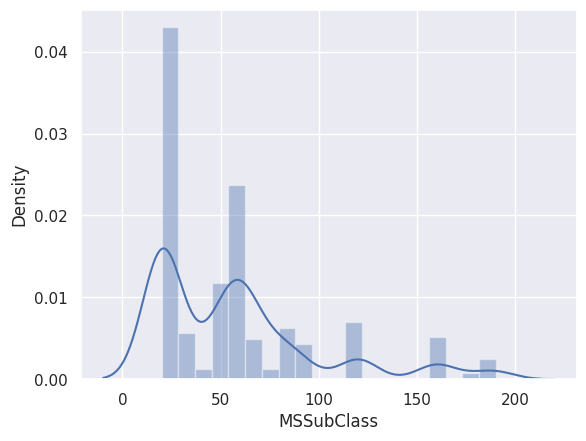

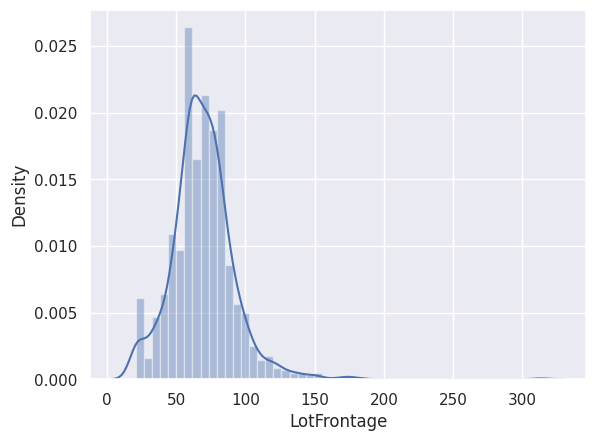

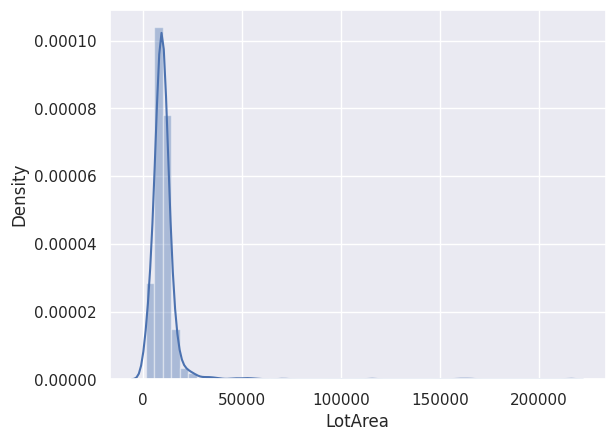

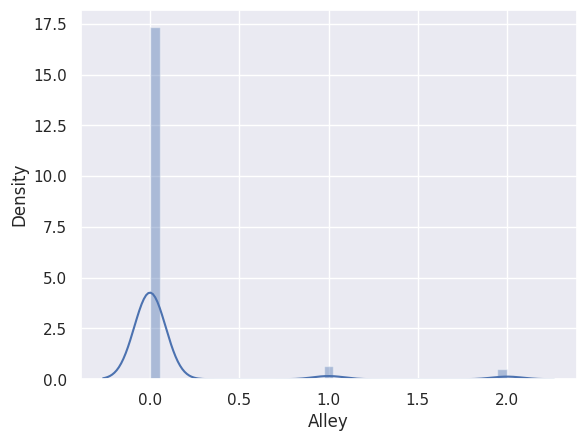

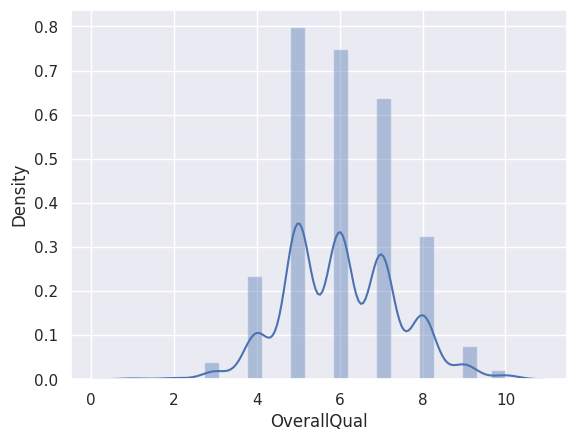

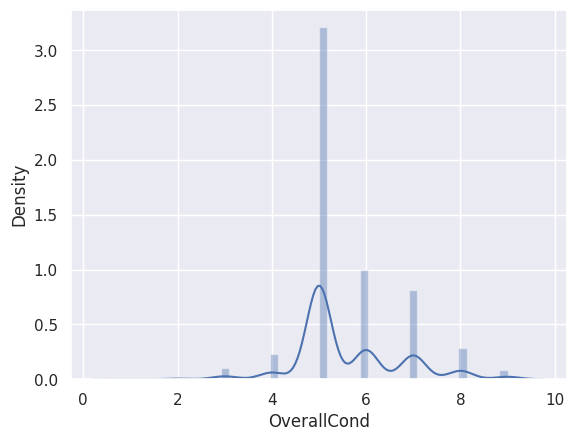

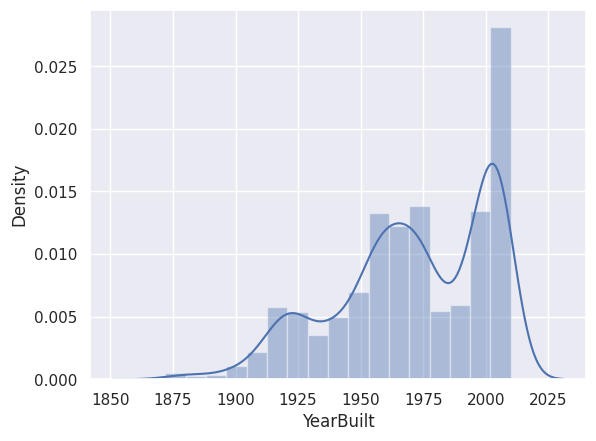

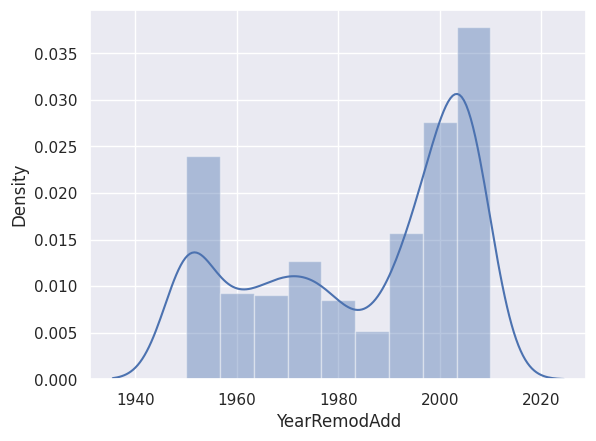

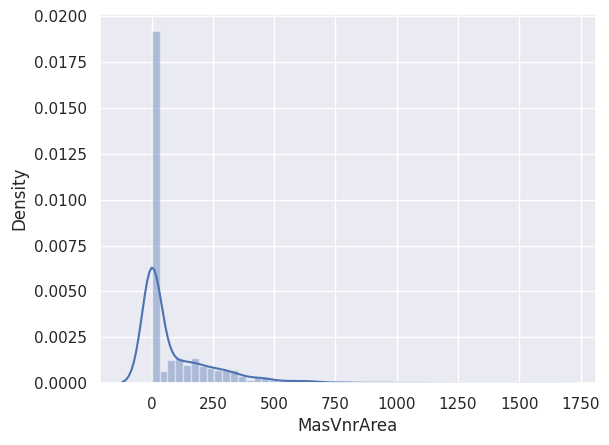

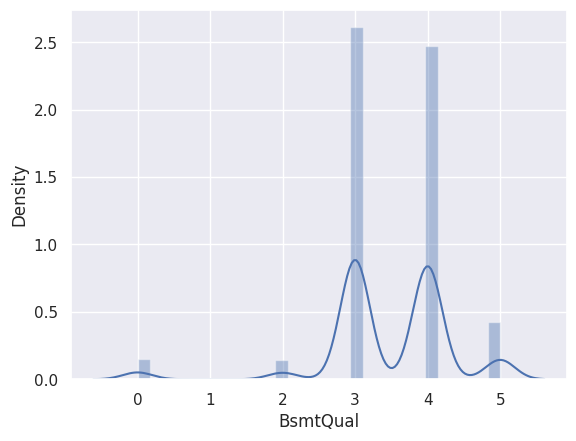

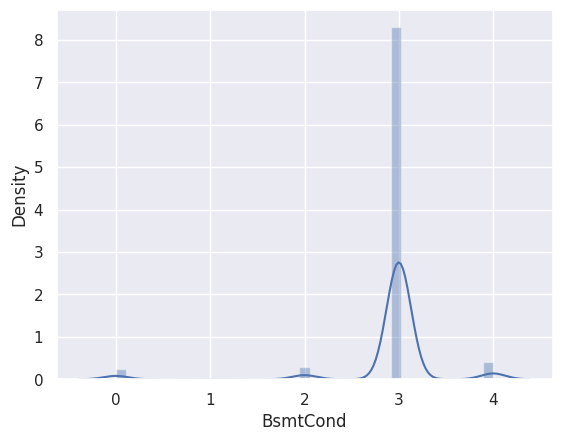

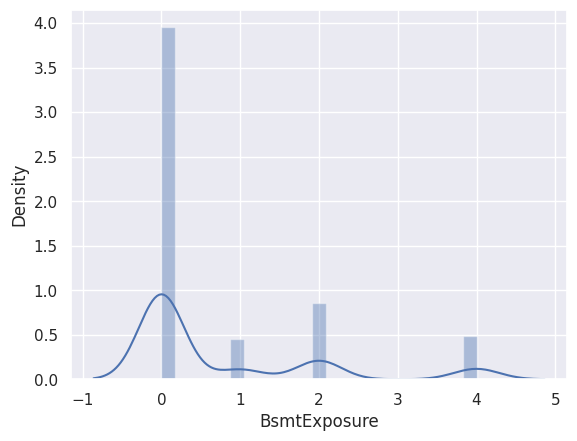

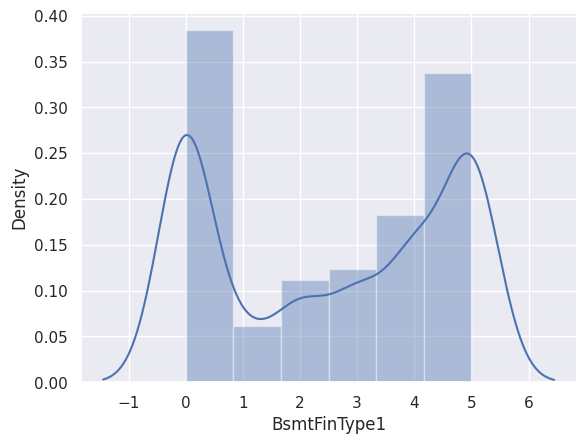

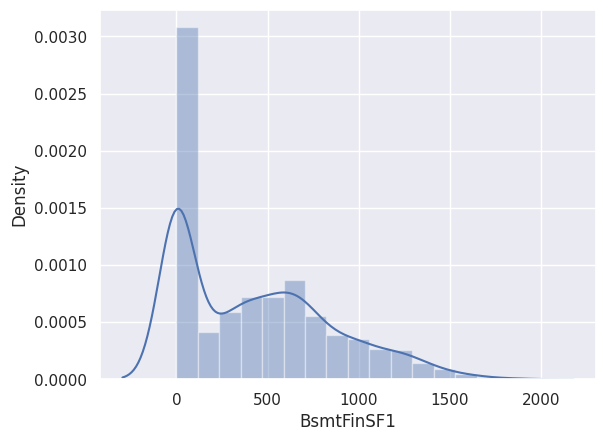

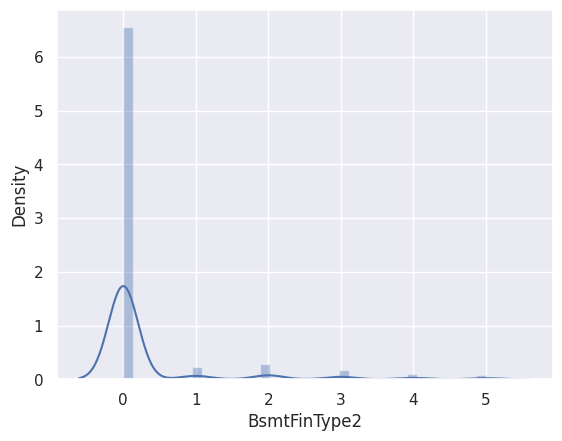

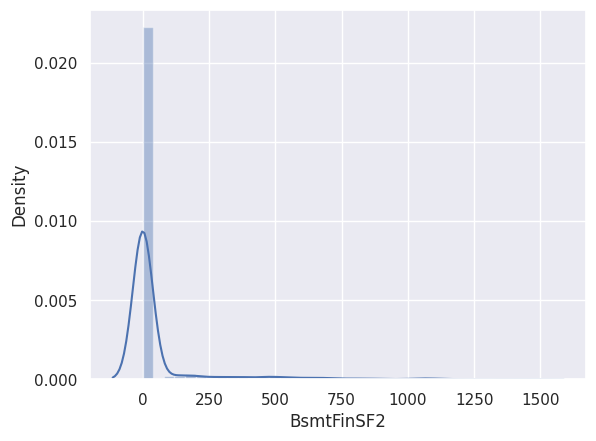

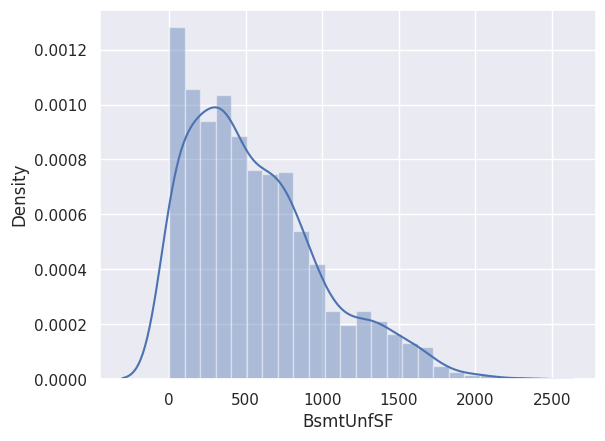

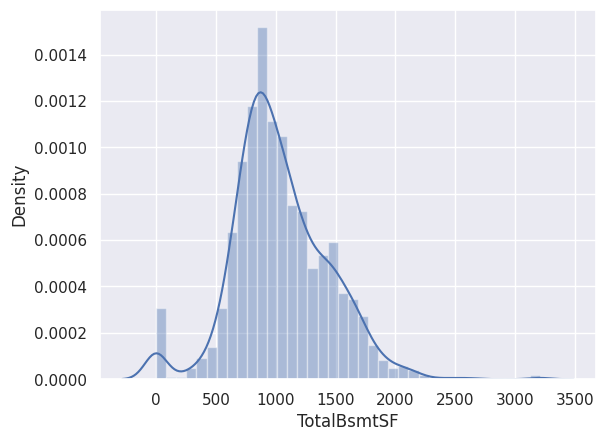

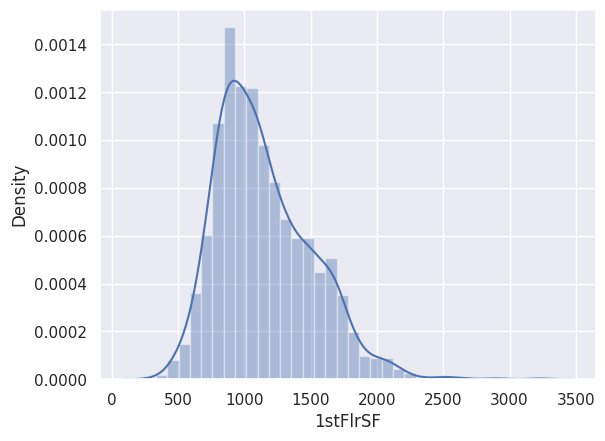

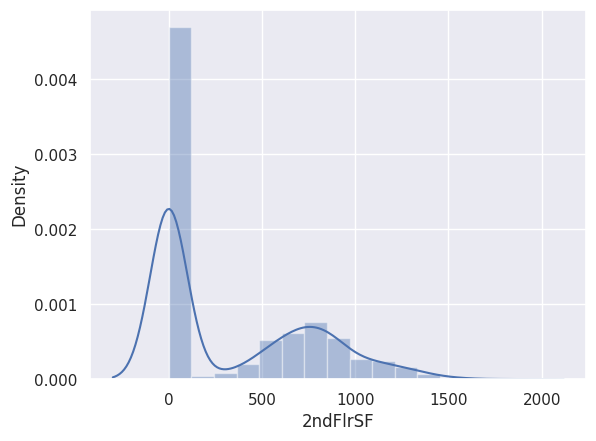

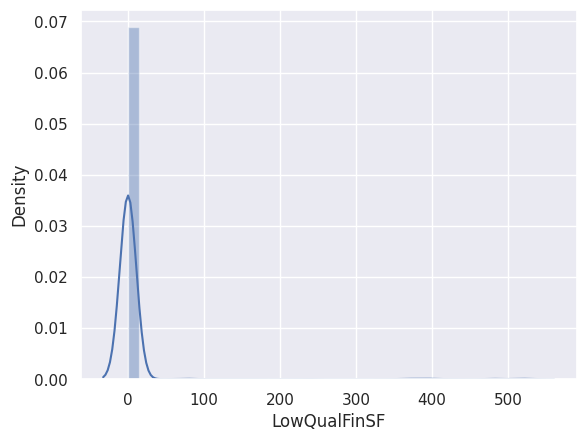

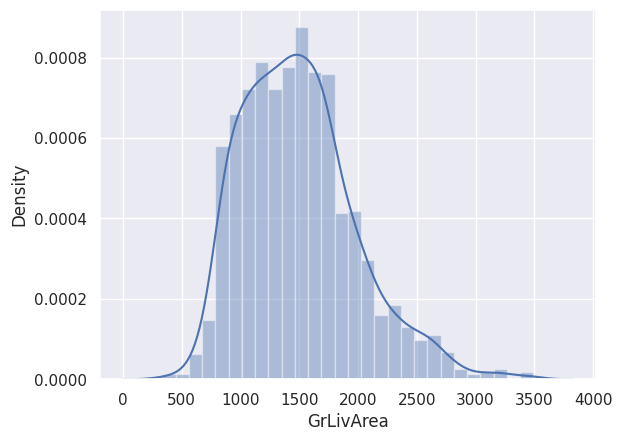

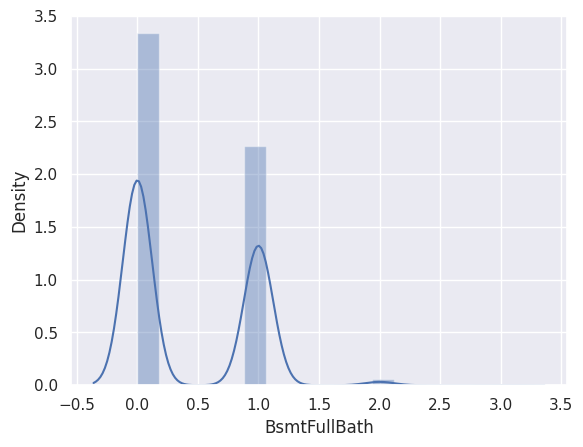

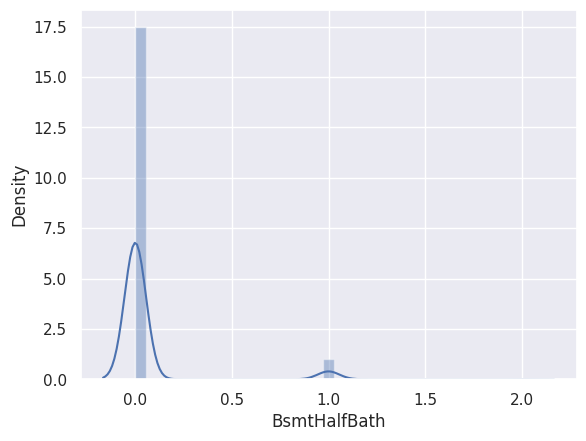

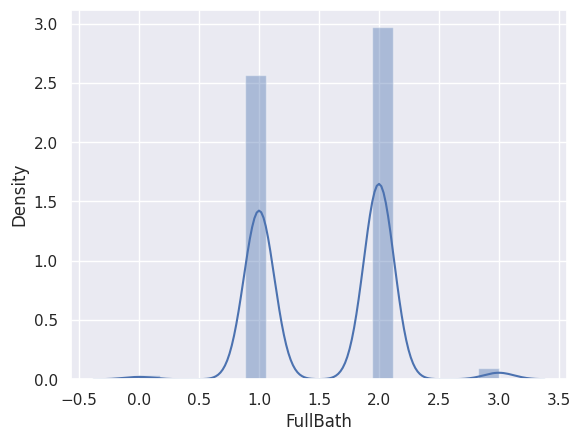

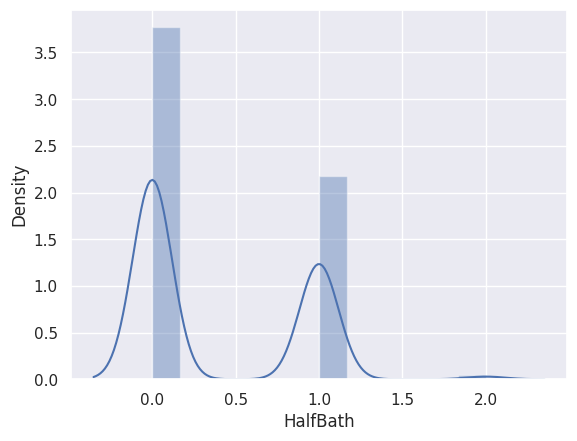

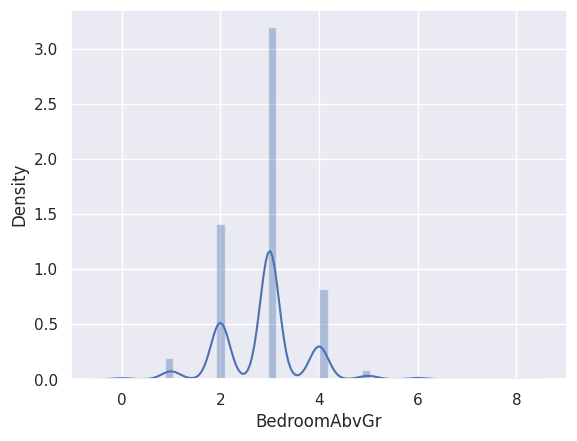

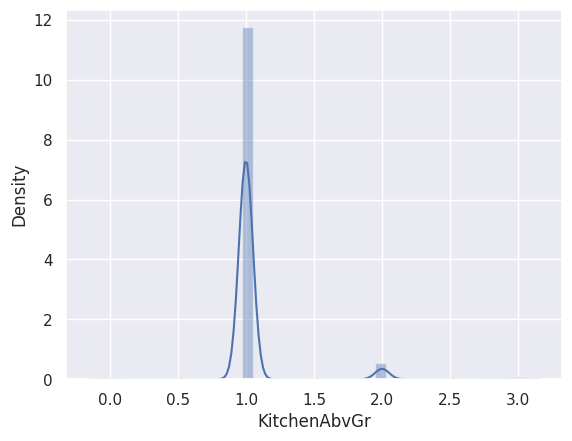

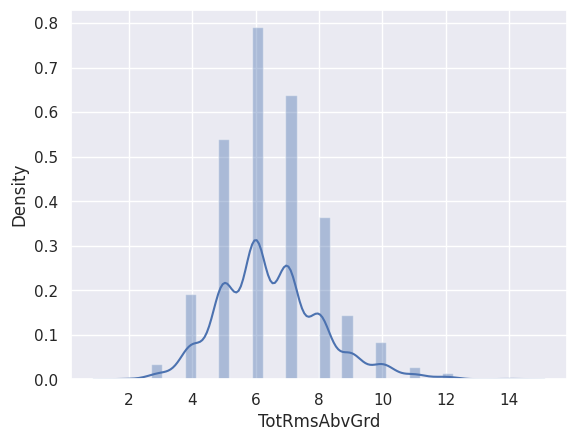

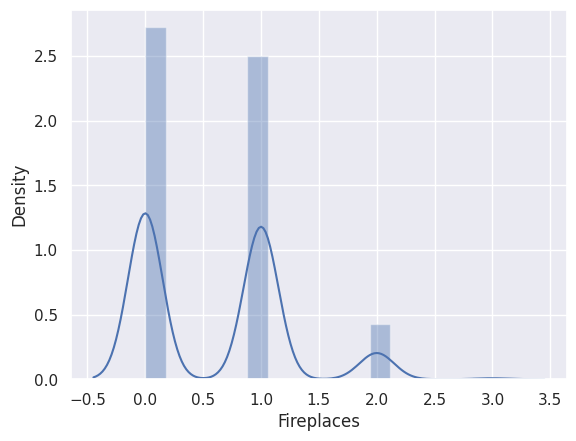

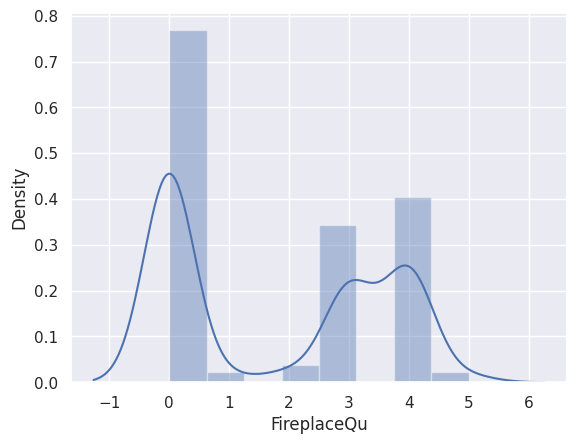

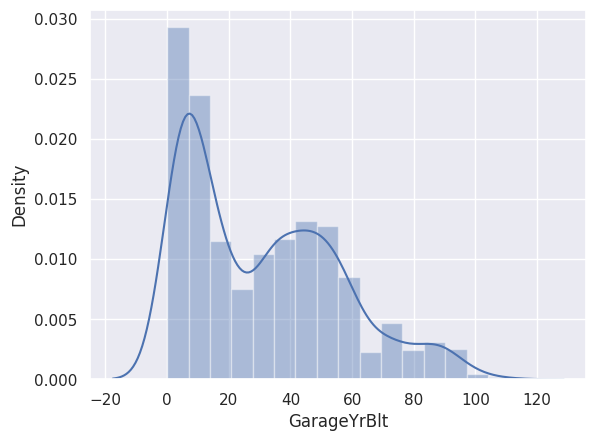

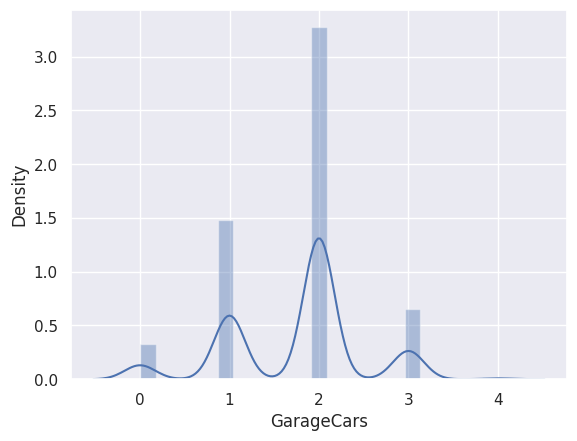

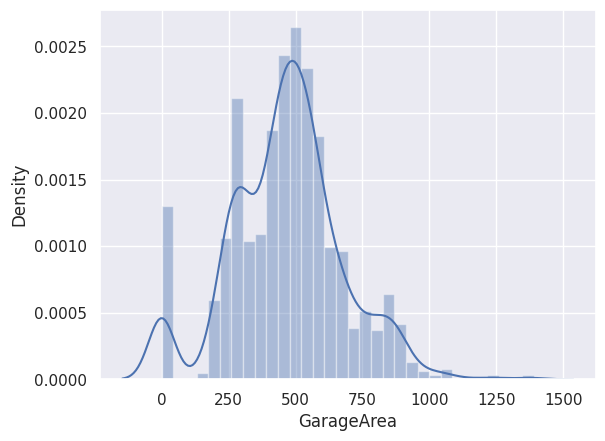

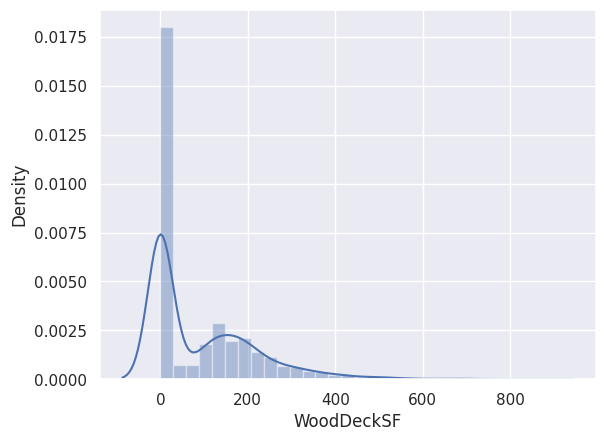

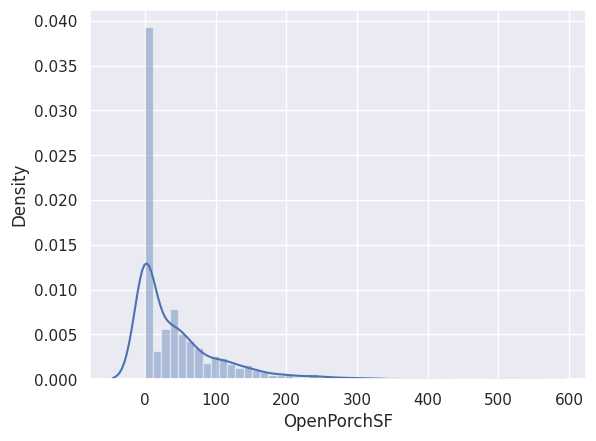

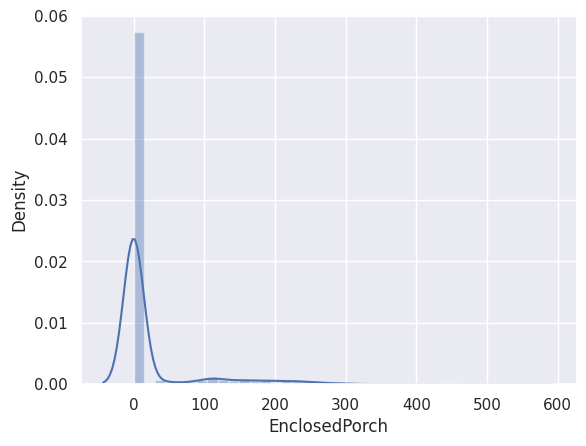

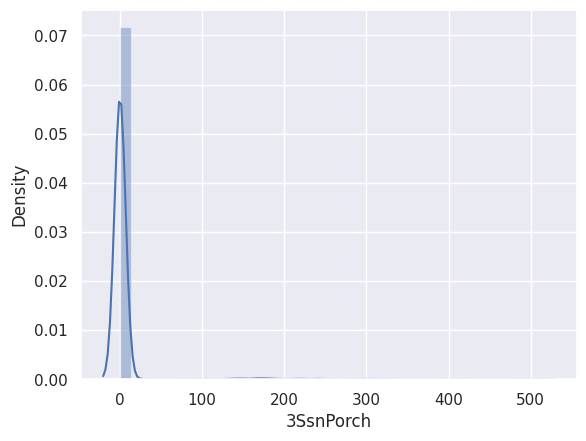

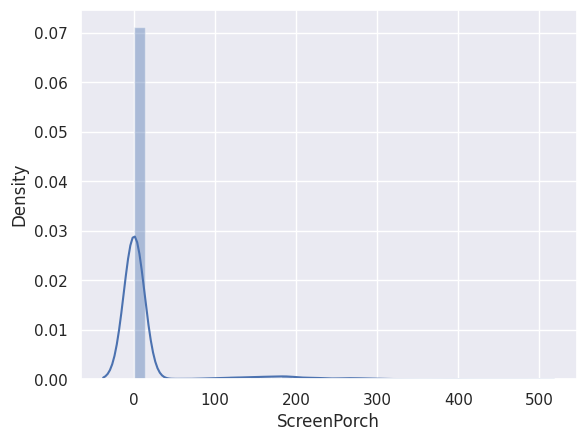

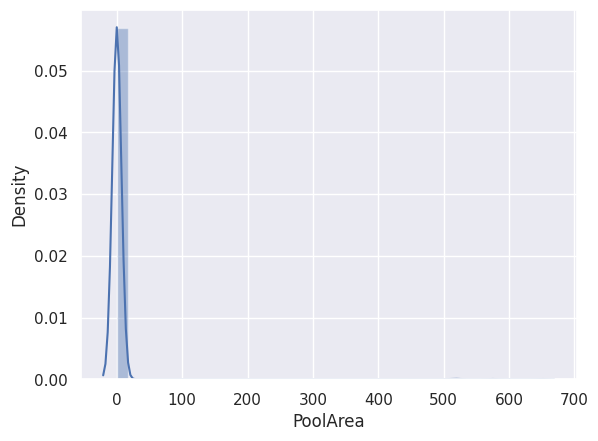

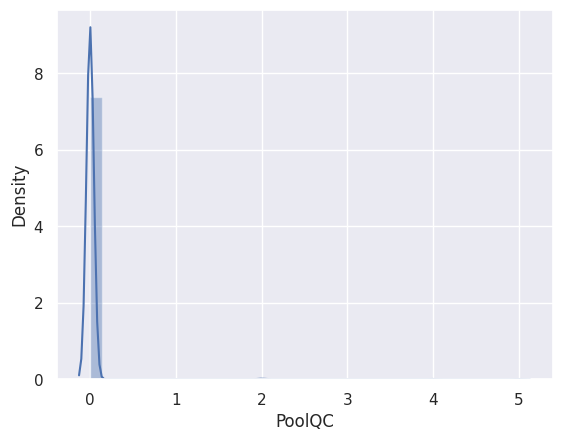

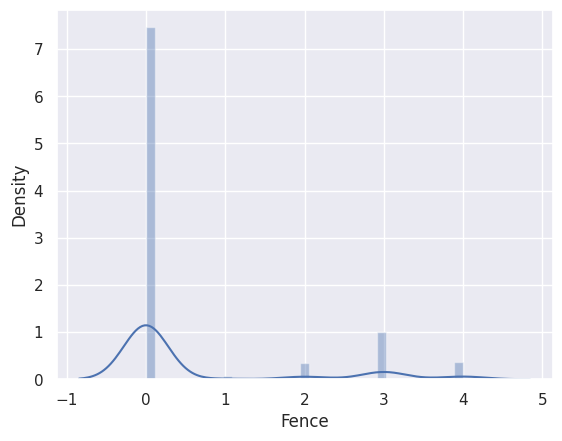

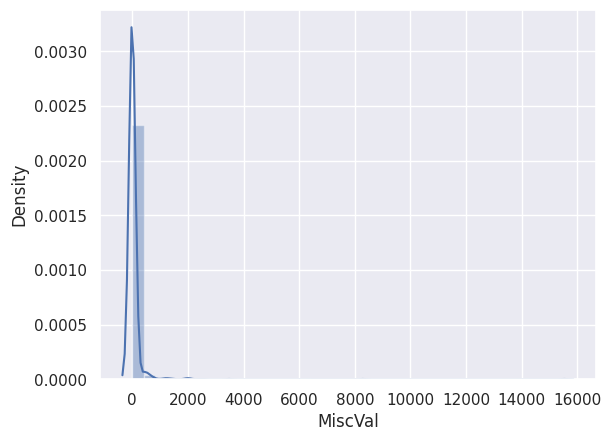

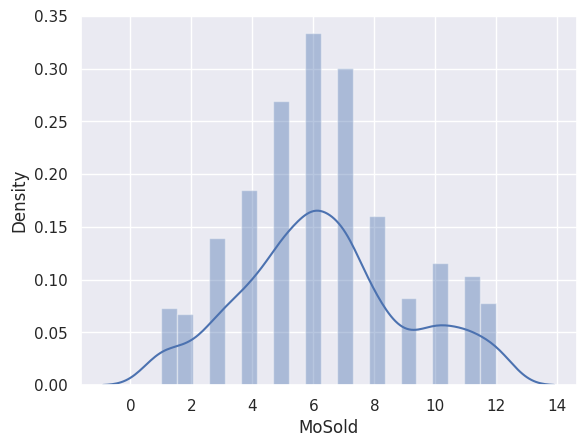

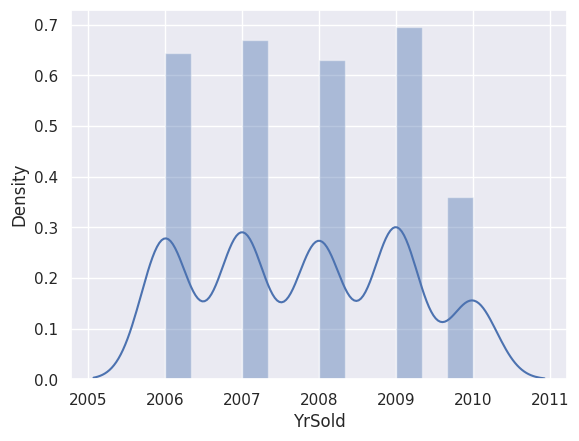

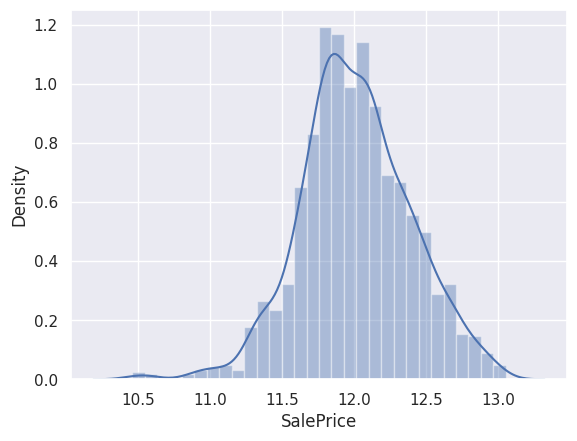

In [19]:
## several variables exists skewness heance we transformed them into log(x+1)
for col in train_wo_out[train_wo_out.columns[train_wo_out.dtypes!=np.object]].columns.tolist()[1:]:
  sns.set()
  sns.distplot(train_wo_out[col])
  plt.show()
cols = ['LotFrontage','LotArea', 'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
'1stFlrSF','2ndFlrSF','LowQualFinSF','GarageArea','WoodDeckSF',
'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','GrLivArea','PoolArea','MiscVal']
for col in cols:
  train_wo_out[col]=np.log1p(train_wo_out[col])

In [20]:
## Following varaibles need to be considered based on the pariwise scatter plot 

# ["2ndFlrSF", "LowQualFinSF", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "KitchenAbvGr"]
# ["Fireplaces", "GarageCars", 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
conti_var = train_wo_out[train_wo_out.columns[train_wo_out.dtypes!=np.object]].columns.tolist()[1:-1]
for i in range(0,len(conti_var),10):
    sns.set()
    cols = ['SalePrice'] + conti_var[i:i+10]
    sns.pairplot(train_wo_out[cols], size = 1.5)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

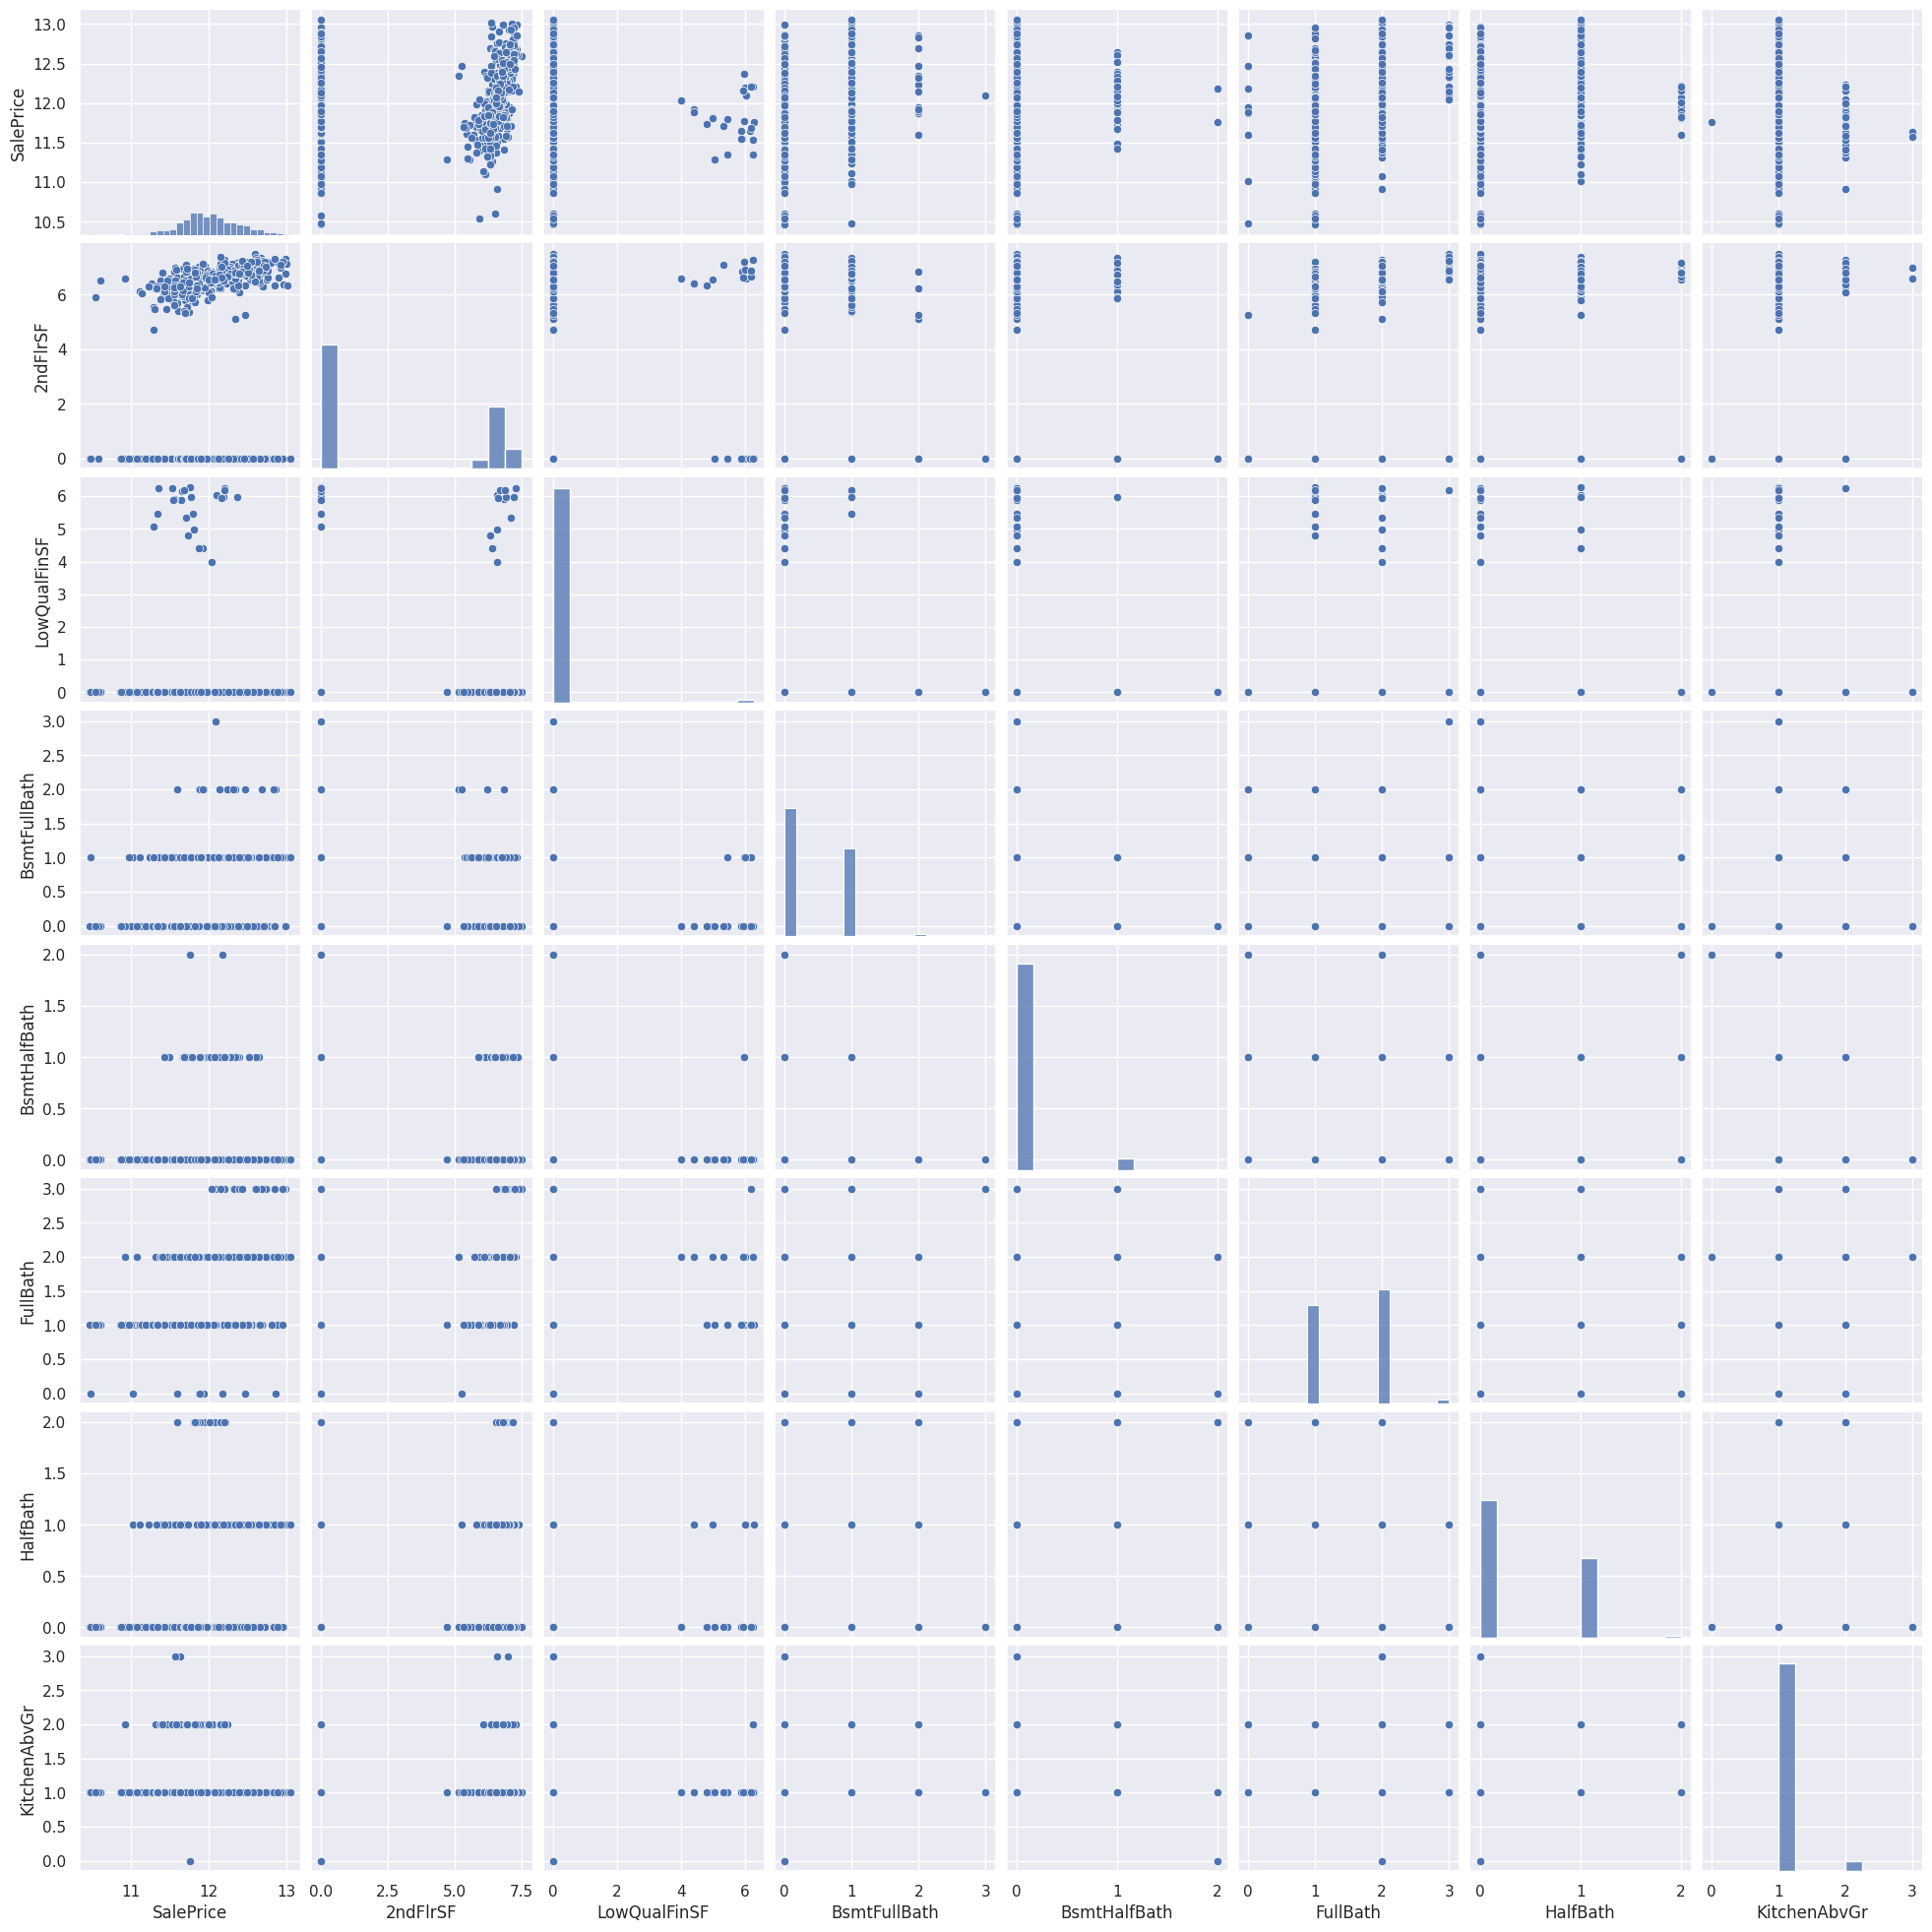

In [21]:
## conti. variable
# ["2ndFlrSF", "LowQualFinSF", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "KitchenAbvGr"]
# "2ndFlrSF" x "FullBath" to be the new parameter
cols = ['SalePrice', "2ndFlrSF", "LowQualFinSF", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "KitchenAbvGr"]
tmp = train_wo_out[cols]
sns.set()
sns.pairplot(tmp, size = 2.5)
plt.show()

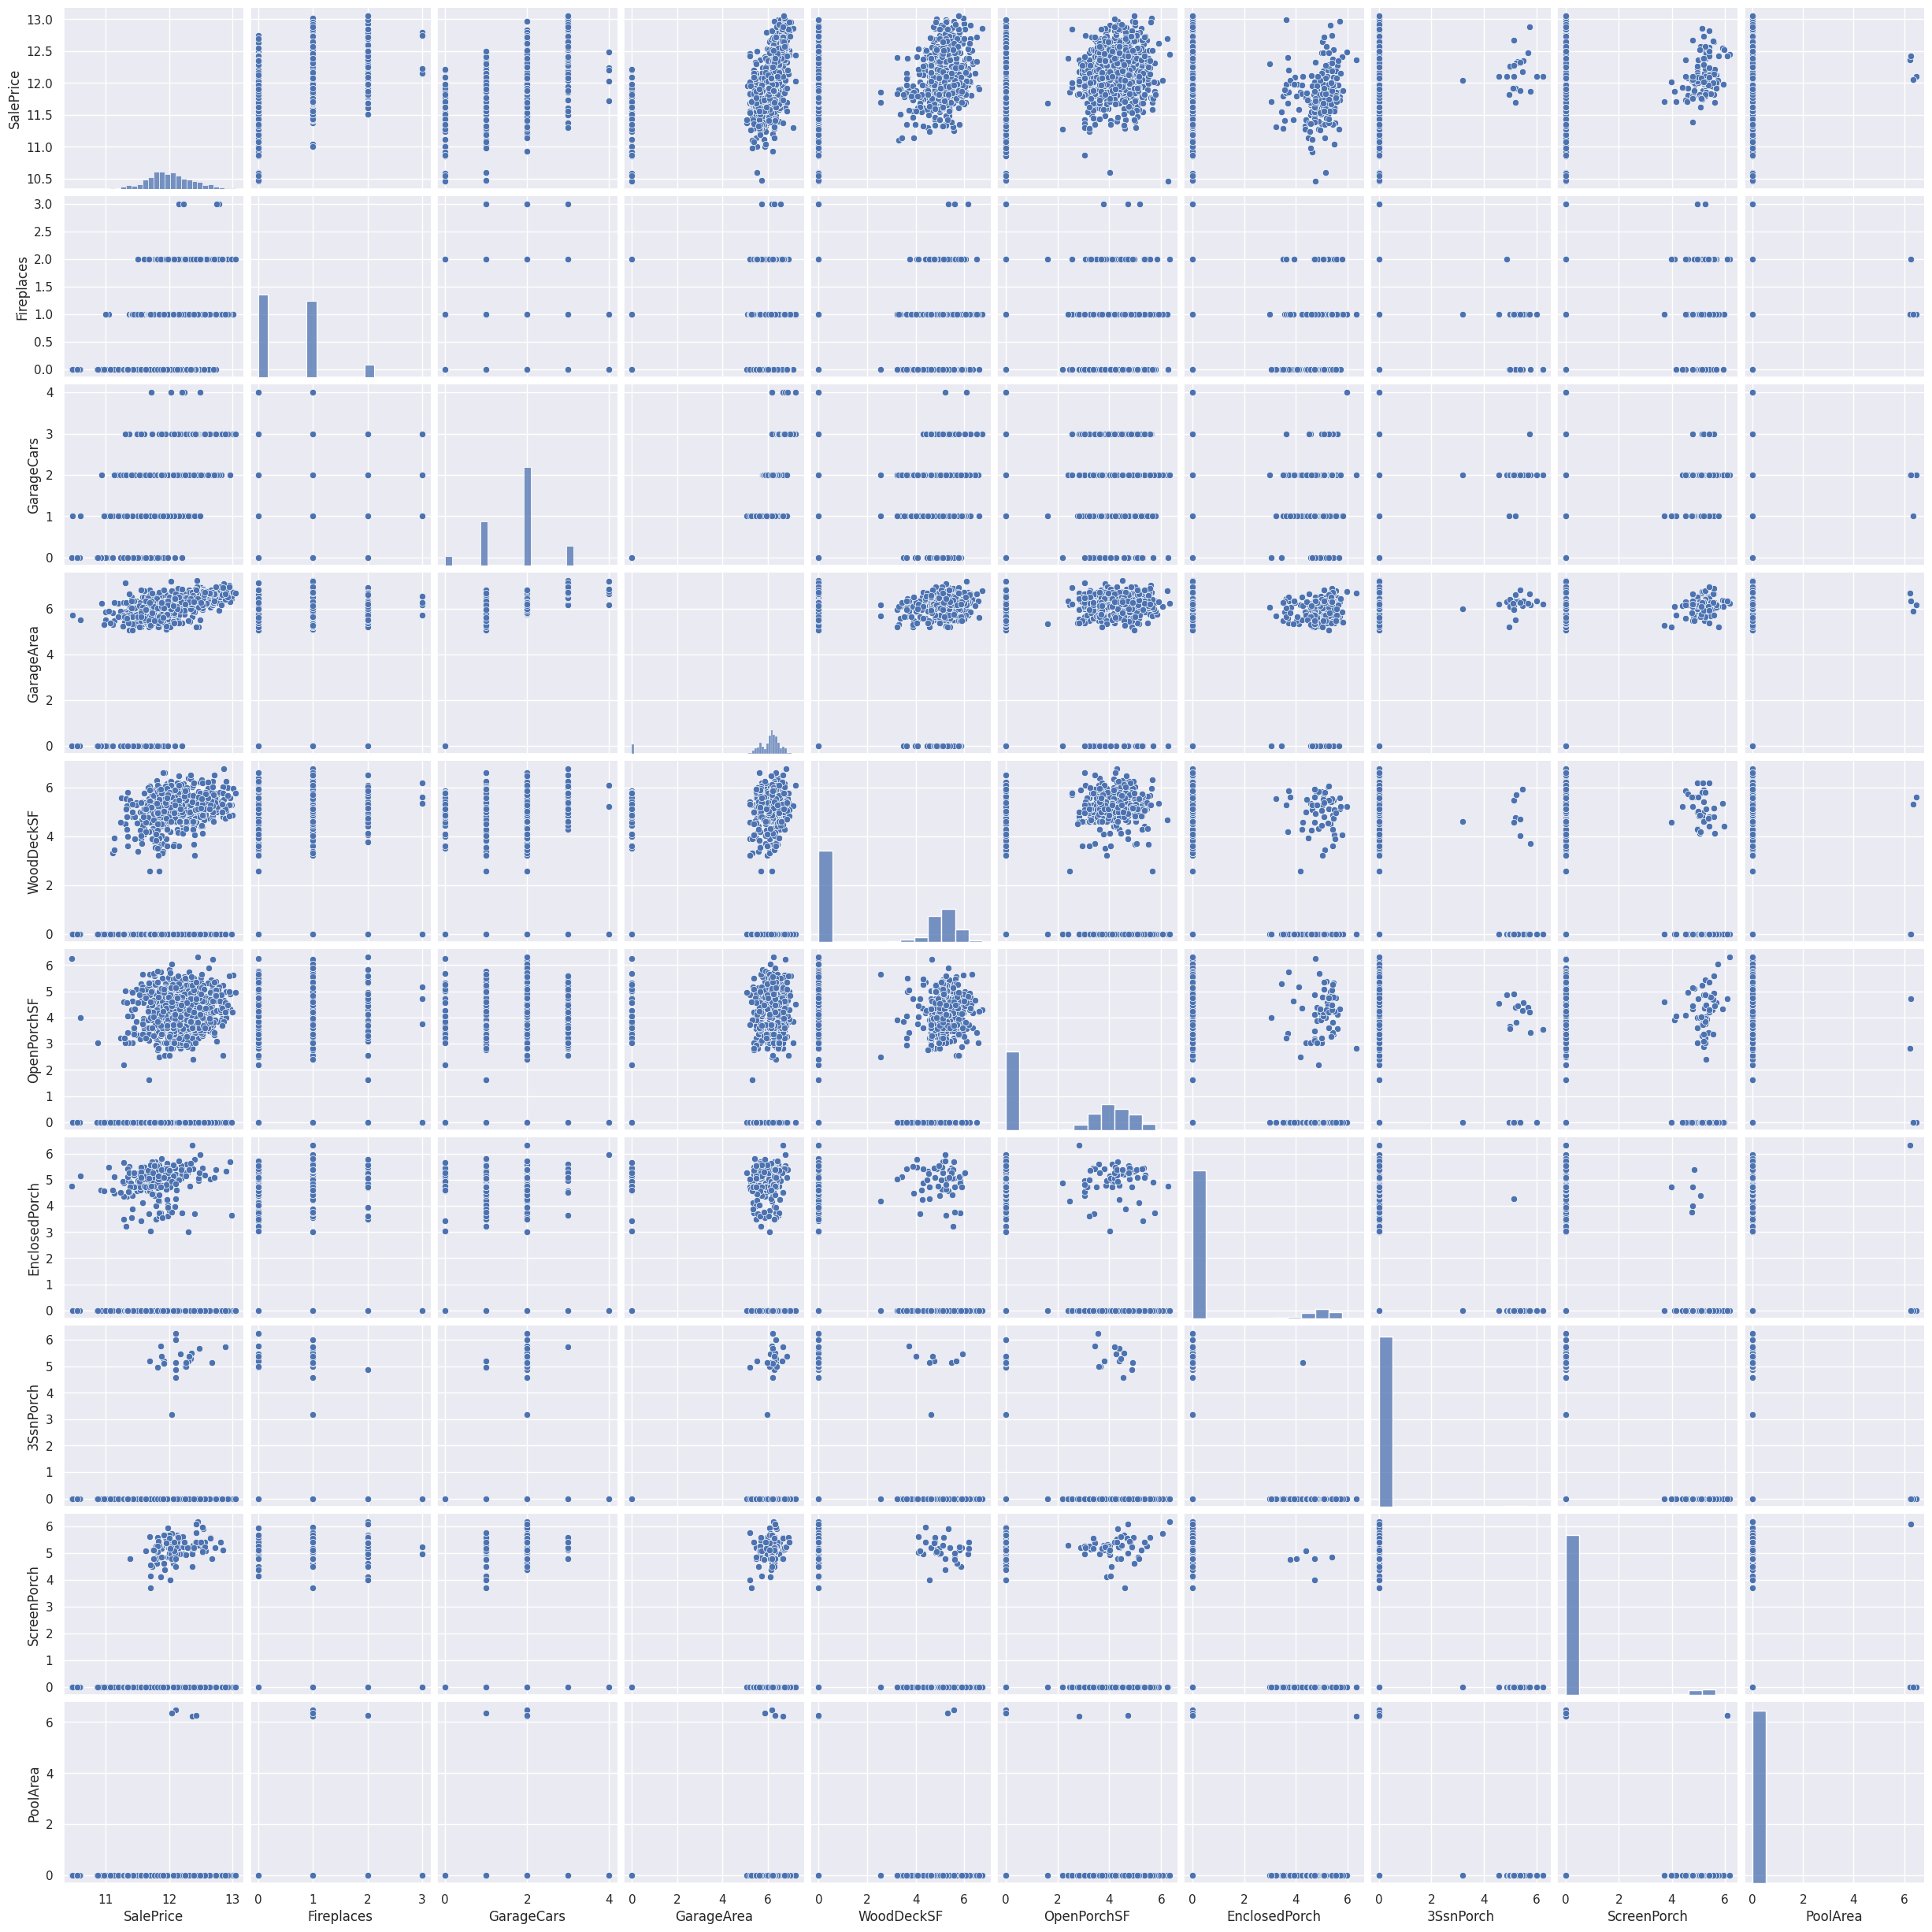

In [22]:
# ["Fireplaces", "GarageCars", 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
# "GarageCars" x 'GarageArea' will be the new parameter
cols=['SalePrice', "Fireplaces", "GarageCars", 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
tmp = train_wo_out[cols]
sns.set()
sns.pairplot(tmp, size = 2.5)
plt.show()

In [23]:
## generate new variable
train_wo_out = train_wo_out.assign(FullBath_n_2ndFlrSF = train_wo_out['FullBath'] * train_wo_out['2ndFlrSF'])
train_wo_out = train_wo_out.assign(GarageCars_n_GarageArea = train_wo_out["GarageCars"] * train_wo_out["GarageArea"])

In [24]:
# 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'GrLivArea' these paramters has visible linear relation with log(SalesPrice+1); we transfer them to x**2
cols = ['TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'GrLivArea']
for col in cols:
  train_wo_out[col] = train_wo_out[col]**2

In [25]:
# one- hot encoding for all np.object columns
data_dum = pd.get_dummies(train_wo_out)
train_wo_out = pd.DataFrame(data_dum)

In [26]:
# filled up Nans in numeric columns with KNN　neighborhood 
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5) 
imputed = imputer.fit_transform(train_wo_out) 
train_wo_out_KNN = pd.DataFrame(imputed, columns=train_wo_out.columns) 

In [27]:
train_wo_out_KNN

,Id,MSSubClass,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,60.0,4.189655,9.042040,0.0,7.0,5.0,2003.0,2003.0,5.283204,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,20.0,4.394449,9.169623,0.0,6.0,8.0,1976.0,1976.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,60.0,4.234107,9.328212,0.0,7.0,5.0,2001.0,2002.0,5.093750,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,70.0,4.110874,9.164401,0.0,7.0,5.0,1915.0,1970.0,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5.0,60.0,4.442651,9.565284,0.0,8.0,5.0,2000.0,2000.0,5.860786,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,1456.0,60.0,4.143135,8.976894,0.0,6.0,5.0,1999.0,2000.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1433,1457.0,20.0,4.454347,9.486152,0.0,6.0,6.0,1978.0,1988.0,4.787492,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1434,1458.0,70.0,4.204693,9.109746,0.0,7.0,9.0,1941.0,2006.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1435,1459.0,20.0,4.234107,9.181735,0.0,5.0,6.0,1950.0,1996.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Data Pre-processing:

In [28]:
import statsmodels.api as sm
from scipy.stats import t
from sklearn.impute import KNNImputer

def preprocess(data, train_idx):
    train = data[:train_idx]
    ## skewness of dependent variable
    train['SalePrice'] = np.log1p(train['SalePrice'])
    train_wo_nan = train[train.columns[~train.isnull().any()]]
    
    ## remove outlier by studentized residual
    conti_var = train_wo_nan[train_wo_nan.columns[train_wo_nan.dtypes!=np.object]].columns.tolist()[1:-1]
    x = train_wo_nan[conti_var]
    x = sm.add_constant(x)
    y = train_wo_nan['SalePrice']
    model = sm.OLS(y, x).fit() 
    # calculate studentized residuals 
    stud_res = model.outlier_test() 

    # define predictor variable values and studentized residuals 
    x = x.index.tolist()
    y = stud_res['student_resid']
    train_wo_out = train[(y<stats.t(df=len(y)-len(conti_var)-1).ppf((0.995))) & (y>stats.t(df=len(y)-len(conti_var)-1).ppf((0.005)))]
    
    # 完成training data remove outlier, 合併test data
    data_wo_out = pd.concat((train_wo_out, data[train_idx:]), sort=False).reset_index(drop=True)
    
    
    ## 補值
    data_wo_out["Alley"][data_wo_out["Alley"].isnull()]=0
    data_wo_out["Alley"][data_wo_out["Alley"]=='Grvl']=1
    data_wo_out["Alley"][data_wo_out["Alley"]=='Pave']=2
    data_wo_out["Alley"]=pd.to_numeric(data_wo_out["Alley"])

    data_wo_out['MasVnrType'][data_wo_out['MasVnrType'].isnull()] = 'CBlock'

    Bsmt_idx = data_wo_out[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].isnull().all(axis=1)
    qual = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
    for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
      data_wo_out[col][Bsmt_idx] = 0
      for q in qual:
        data_wo_out[col][data_wo_out[col]==q] = qual[q]

    Exp_Qual = {'Gd':4, 'Av':3, 'Mn':2, 'No':0}
    for q in Exp_Qual:
      data_wo_out['BsmtExposure'][data_wo_out['BsmtExposure']==q] = Exp_Qual[q]

    Fin_Qual = {"GLQ":5,"ALQ":4,"BLQ":3,"Rec":2,"LwQ":1,"Unf":0}
    for q in Fin_Qual:
      data_wo_out['BsmtFinType1'][data_wo_out['BsmtFinType1']==q] = Fin_Qual[q]
      data_wo_out['BsmtFinType2'][data_wo_out['BsmtFinType2']==q] = Fin_Qual[q]

    for i in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
      data_wo_out[i] = pd.to_numeric(data_wo_out[i])


    data_wo_out['FireplaceQu'][data_wo_out['Fireplaces']==0]=0
    for q in qual:
      data_wo_out['FireplaceQu'][data_wo_out['FireplaceQu']==q] = qual[q] 
    data_wo_out['FireplaceQu'] = pd.to_numeric(data_wo_out['FireplaceQu'])

    Garage_idx = data_wo_out[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']].isnull().all(axis=1)
    for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
      data_wo_out[col][Garage_idx] = 'None'
    data_wo_out['GarageYrBlt'] = data_wo_out['GarageYrBlt'].max()+1-data_wo_out['GarageYrBlt']
    data_wo_out['GarageYrBlt'][Garage_idx]=0
    data_wo_out['GarageYrBlt'] = pd.to_numeric(data_wo_out['GarageYrBlt'])


    data_wo_out['PoolQC'][data_wo_out['PoolArea']==0]=0
    for q in qual:
      data_wo_out['PoolQC'][data_wo_out['PoolQC']==q] = qual[q]  
    data_wo_out['PoolQC'] = pd.to_numeric(data_wo_out['PoolQC'])

    data_wo_out['Fence'][data_wo_out['Fence'].isnull()]=0
    FenceQual = {"GdPrv":4,"MnPrv":3,"GdWo":2,"MnWw":1}
    for q in FenceQual:
      data_wo_out['Fence'][data_wo_out['Fence']==q] = FenceQual[q]
    data_wo_out['Fence'] = pd.to_numeric(data_wo_out['Fence'])

    data_wo_out["MiscFeature"][data_wo_out["MiscFeature"].isnull()] = "None"

    ## several non consistent data filled up with mode or 0
    train_wo_out['BsmtExposure'][train_wo_out['BsmtExposure'].isnull()] = 0
    train_wo_out['BsmtFinType2'][train_wo_out['BsmtFinType2'].isnull()] = 0
    train_wo_out['Electrical'][train_wo_out['Electrical'].isnull()] = train_wo_out['Electrical'].mode().iloc[0]
    
    ## remove skewness
    cols = ['LotFrontage','LotArea', 'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
            '1stFlrSF','2ndFlrSF','LowQualFinSF','GarageArea','WoodDeckSF',
            'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','GrLivArea','PoolArea','MiscVal']
    for col in cols:
      data_wo_out[col]=np.log1p(data_wo_out[col])

    ## generate new variable
    data_wo_out = data_wo_out.assign(FullBath_n_2ndFlrSF = data_wo_out['FullBath'] * data_wo_out['2ndFlrSF'])
    data_wo_out = data_wo_out.assign(GarageCars_n_GarageArea = data_wo_out["GarageCars"] * data_wo_out["GarageArea"])

    # 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'GrLivArea' these paramters has visible linear relation with log(SalesPrice+1); we transfer them to x**2
    cols = ['TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'GrLivArea']
    for col in cols:
      data_wo_out[col] = data_wo_out[col]**2
    
    # one- hot encoding for all np.object columns
    data_dum = pd.get_dummies(data_wo_out)
    data_wo_out = pd.DataFrame(data_dum)

    # filled up Nans in numeric columns with KNN neighborhood 
    data_wo_out_n_y = data_wo_out.drop(["SalePrice"], axis=1)
    imputer = KNNImputer(n_neighbors=5) 
    imputed = imputer.fit_transform(data_wo_out_n_y) 
    data_wo_out_KNN = pd.DataFrame(imputed, columns=data_wo_out_n_y.columns) 
    y_train = data_wo_out[["SalePrice"]][data_wo_out["Id"]<=1460]
    x_train = data_wo_out_KNN[data_wo_out_KNN["Id"]<=1460]
    x_test = data_wo_out_KNN[data_wo_out_KNN["Id"]>1460]
    return x_train, y_train, x_test

In [29]:
# prep data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# concate train/test data
data = pd.concat((train, test), sort=False).reset_index(drop=True)
x_train, y_train, x_test = preprocess(data,1460)

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.3)

# Modeling:

Method Reference: https://medium.com/@permoonzz/kaggle-house-prices-advanced-regression-techniques-python-ensemble-learning%E5%AF%A6%E5%81%9A-99f757f4d326

In [31]:
## Regression: multiple regression, Ridge regression、Lasso、Elastic net、Support vector regression

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import math
import sklearn.model_selection as ms
import sklearn.metrics as sklm

In [33]:
from sklearn.linear_model import LinearRegression
Linear = LinearRegression(fit_intercept=True)

Linear_fit=Linear.fit(x_train,y_train)

y_linear_train=Linear_fit.predict(x_train)
y_linear_valid=Linear_fit.predict(x_valid)

# validation( train data and validate data)
print('RMSE_train_Linear = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_linear_train))))
print('RMSE_valid_Linear = ' + str(math.sqrt(sklm.mean_squared_error(y_valid, y_linear_valid))))

RMSE_train_Linear = 0.0755437288592347
RMSE_valid_Linear = 0.11746455943291902


In [35]:
from sklearn.linear_model import RidgeCV

alpha = [0.0001,0.001,0.01,0.1,1,10,100]
# find the best alpha and build model
Ridge = RidgeCV(cv=5, alphas=alpha) # the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm.

Ridge_fit=Ridge.fit(x_train,y_train)

y_ridge_train=Ridge_fit.predict(x_train)
y_ridge_valid=Ridge_fit.predict(x_valid)

# validation( train data and validate data)
print('RMSE_train_Ridge = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_ridge_train))))
print('RMSE_valid_Ridge = ' + str(math.sqrt(sklm.mean_squared_error(y_valid, y_ridge_valid))))

RMSE_train_Ridge = 0.08119982411067711
RMSE_valid_Ridge = 0.09406787025968308


In [37]:
# LASSO:
from sklearn.linear_model import LassoCV
# set cross-validation alpha
alpha = [0.0001,0.001,0.01,0.1,1,10,100]
# find the best alpha and build model
Lasso = LassoCV(cv=5, alphas=alpha)
Lasso_fit=Lasso.fit(x_train,y_train)
y_lasso_train=Lasso_fit.predict(x_train)
y_lasso_valid=Lasso_fit.predict(x_valid)
# validation( train data and validate data)
print('RMSE_train_Lasso = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_lasso_train))))
print('RMSE_valid_Lasso = ' + str(math.sqrt(sklm.mean_squared_error(y_valid, y_lasso_valid))))

RMSE_train_Lasso = 0.09026710137251456
RMSE_valid_Lasso = 0.0935879480840077


In [48]:
from sklearn.linear_model import ElasticNetCV
# set cross-validation alpha and l1ratio
alpha=[0.0001,0.001,0.01,0.1,1,10,100]
l1ratio = [0.1, 0.5, 0.9, 0.95, 0.99, 1]
# find the best alpha/l1ratio and build model
elastic_cv = ElasticNetCV(cv=5,max_iter=int(1e7),alphas=alpha, l1_ratio=l1ratio)
elastic_fit = elastic_cv.fit(x_train, y_train)
y_el_train=elastic_fit.predict(x_train)
y_el_valid=elastic_fit.predict(x_valid)
# validation( train data and validate data)
print('RMSE_train_ElasticNet = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_el_train))))
print('RMSE_valid_ElasticNet = ' + str(math.sqrt(sklm.mean_squared_error(y_valid, y_el_valid))))

RMSE_train_ElasticNet = 0.08632250337768047
RMSE_valid_ElasticNet = 0.09288607330496125


In [49]:
from sklearn.svm import SVR
CV = {}
alpha=[1,10,100,1000,1e4,1e5]
for alp in alpha:
  svr = SVR(kernel='rbf', C=alp)
  svr_fit=svr.fit(x_train, y_train)
  y_svr_train=svr_fit.predict(x_train)
  y_svr_valid=svr_fit.predict(x_valid)
  # validation( train data and validate data)
  CV[alp] = math.sqrt(sklm.mean_squared_error(y_valid, y_svr_valid))

C = [key for key, cv in CV.items() if cv==min(CV.values())]
svr = SVR(kernel='rbf', C=C[0])
svr_fit=svr.fit(x_train, y_train)
y_svr_train=svr_fit.predict(x_train)
y_svr_valid=svr_fit.predict(x_valid)
print('C = ' + str(C[0]) + ', RMSE_train_svr = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_svr_train))))
print('C = ' + str(C[0]) + ', RMSE_valid_svr = ' + str(math.sqrt(sklm.mean_squared_error(y_valid, y_svr_valid))))

C = 100000.0, RMSE_train_svr = 0.08057442066638801
C = 100000.0, RMSE_valid_svr = 0.09805628144657504


In [ ]:
## Boosting method: Adaboost、Gradient boosting、XGBoost、Staking、LightGBM

In [51]:
from lightgbm import LGBMRegressor
estimator=LGBMRegressor()
parameter_grid={'max_depth':range(2,5,1),
        'learning_rate':np.linspace(0.001,1,20),
        'feature_fraction':np.linspace(0.5,0.99,20),
        'bagging_fraction':np.linspace(0.1,0.99,20),
        'bagging_frequency':range(5,10,1),
        'num_leaves':range(100,200,5),
        'min_data_in_leaf':range(50,200,10),
        'n_estimators':range(100,5000,100)}
grid = RandomizedSearchCV(estimator,parameter_grid,cv=3,scoring='neg_root_mean_squared_error',n_iter=int(1e2),n_jobs=-1)
grid.fit(x_train, y_train)
# print best parameter combination
print(grid.best_params_)

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.9642105263157894, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9642105263157894
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] bagging_fraction is set=0.14684210526315788, subsample=1.0 will be ignored. Current value: bagging_fraction=0.14684210526315788
{'num_leaves': 190, 'n_estimators': 200, 'min_data_in_leaf': 120, 'max_depth': 3, 'learning_rate': 0.05357894736842105, 'feature_fraction': 0.9642105263157894, 'bagging_frequency': 7, 'bagging_fraction': 0.14684210526315788}


In [56]:
lightgbm = LGBMRegressor(objective='regression', 
                         num_leaves=grid.best_params_["num_leaves"],
                         min_data_in_leaf=20,
                         learning_rate=grid.best_params_["learning_rate"],
                         n_estimators=grid.best_params_["n_estimators"],
                         metric="rmse",
                         max_depth=grid.best_params_["max_depth"],
                         bagging_fraction=grid.best_params_["bagging_fraction"],
                         bagging_freq=grid.best_params_["bagging_frequency"],
                         bagging_seed=9,
                         feature_fraction=grid.best_params_["feature_fraction"],
                         feature_fraction_seed=7,
                         verbose=-1)
lgbm_fit = lightgbm.fit(x_train, y_train)
y_lgbm_train=lgbm_fit.predict(x_train)
y_lgbm_valid=lgbm_fit.predict(x_valid)
print('RMSE_train_LGBM = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_lgbm_train))))
print('RMSE_valid_LGBM = ' + str(math.sqrt(sklm.mean_squared_error(y_valid, y_lgbm_valid))))

RMSE_train_LGBM = 0.10425370103215889
RMSE_valid_LGBM = 0.11271731346949454


In [68]:
from xgboost.sklearn import XGBRegressor
estimator=XGBRegressor()
parameter_grid={
        'max_depth':range(2,5,1),
        'learning_rate':np.linspace(0.001,1,20),
        'colsample_bytree':np.linspace(0.1,0.99,20),
        # 'num_leaves':range(100,200,5),
        'n_estimators':range(100,5000,100)}
grid = RandomizedSearchCV(estimator,parameter_grid,cv=3,scoring = 'neg_root_mean_squared_error',n_iter=2,n_jobs=-1)
grid.fit(x_train, y_train)
# print best parameter combination
print (grid.best_params_)

{'n_estimators': 600, 'max_depth': 3, 'learning_rate': 0.15873684210526315, 'colsample_bytree': 0.1}


In [70]:
xgb= XGBRegressor(base_score=0.5, 
                  booster='gbtree', 
                  colsample_bylevel=1,
                  colsample_bynode=1, 
                  colsample_bytree=grid.best_params_["colsample_bytree"], 
                  gamma=0,
                  importance_type='gain', 
                  learning_rate=grid.best_params_["learning_rate"],
                  max_delta_step=0,
                  max_depth=grid.best_params_["max_depth"], 
                  missing=1, 
                  n_estimators=grid.best_params_["n_estimators"],
                  n_jobs=1, 
                  nthread=None, 
                  objective='reg:squarederror', 
                  random_state=0,
                  scale_pos_weight=1, 
                  seed=None,
                  silent=None, 
                  subsample=1, 
                  verbosity=1)
xgb_fit = xgb.fit(x_train, y_train)
y_xgb_train=xgb_fit.predict(x_train)
y_xgb_valid=xgb_fit.predict(x_valid)
print('RMSE_train_XGB = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_xgb_train))))
print('RMSE_valid_XGB = ' + str(math.sqrt(sklm.mean_squared_error(y_valid, y_xgb_valid))))

RMSE_train_XGB = 0.02694604009714677
RMSE_valid_XGB = 0.10437201578793129


# Voting, Stacking, Blending

In [74]:
from sklearn.ensemble import VotingRegressor
# Build Model
vote_mod = VotingRegressor([('Ridge', Ridge_fit), ('Lasso', Lasso_fit), ('Elastic', elastic_fit), ('lgbm', lgbm_fit),('xgb',xgb_fit)])
vote = vote_mod.fit(x_train, y_train.values.ravel())
# predict train/test y
vote_pred_train=vote.predict(x_train)
vote_pred_valid=vote.predict(x_valid)
# validation( train data and validate data)
print('RMSE_train_Voting = ' + str(math.sqrt(sklm.mean_squared_error(y_train, vote_pred_train))))
print('RMSE_valid_Voting = ' + str(math.sqrt(sklm.mean_squared_error(y_valid, vote_pred_valid))))

[LightGBM] [Warning] feature_fraction is set=0.9642105263157894, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9642105263157894
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.14684210526315788, subsample=1.0 will be ignored. Current value: bagging_fraction=0.14684210526315788
RMSE_train_Voting = 0.0712158724505206
RMSE_valid_Voting = 0.09127816630400976


In [76]:
from mlxtend.regressor import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
# Build Model
gbdt=GradientBoostingRegressor(learning_rate=0.05,
                max_leaf_nodes=3,
                n_estimators=100)
stregr = StackingRegressor(regressors=[Ridge_fit, Lasso_fit, elastic_fit, lgbm_fit,xgb_fit], 
                           meta_regressor=gbdt, 
                           use_features_in_secondary=True)
stack_mod=stregr.fit(x_train, y_train.values.ravel())
# predict train/test y
stacking_pred_train=stack_mod.predict(x_train)
stacking_pred_valid=stack_mod.predict(x_valid)
# validation( train data and validate data)
print('RMSE_train_Stacking = ' + str(math.sqrt(sklm.mean_squared_error(y_train, stacking_pred_train))))
print('RMSE_valid_Stacking = ' + str(math.sqrt(sklm.mean_squared_error(y_valid, stacking_pred_valid))))

[LightGBM] [Warning] feature_fraction is set=0.9642105263157894, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9642105263157894
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.14684210526315788, subsample=1.0 will be ignored. Current value: bagging_fraction=0.14684210526315788
RMSE_train_Stacking = 0.03149486712695954
RMSE_test_Stacking = 0.10875339621622943


In [90]:
# set weight list
weight=list(np.linspace(0.1,1,91))
# create outcome dataframe 
train_mse=[]
valid_mse=[]
for i in weight:
    blending_pred_train=(i*vote_pred_train)+((1-i)*stacking_pred_train)
    blending_pred_valid=(i*vote_pred_valid)+((1-i)*stacking_pred_valid)
    train_mse.append(math.sqrt(sklm.mean_squared_error(y_train, blending_pred_train)))
    valid_mse.append(math.sqrt(sklm.mean_squared_error(y_valid, blending_pred_valid)))
blending_output=pd.DataFrame({'weight':weight,
                       'train_mse':train_mse,
                       'valid_mse':valid_mse})
# print top 10 weight value
weight = blending_output.sort_values(by=['valid_mse'],ascending=True)
print(weight.head(10))

    weight  train_mse  valid_mse
90    1.00   0.071216   0.091278
89    0.99   0.070710   0.091313
88    0.98   0.070205   0.091350
87    0.97   0.069701   0.091391
86    0.96   0.069198   0.091435
85    0.95   0.068695   0.091483
84    0.94   0.068194   0.091533
83    0.93   0.067693   0.091586
82    0.92   0.067194   0.091643
81    0.91   0.066695   0.091703


# Submit the predict data

In [92]:
# predict and blending
final_pred_voting=vote.predict(x_test)
final_pred_stacking=stack_mod.predict(x_test)
w = weight.iloc[0]["weight"]
final_pred_blending=w*final_pred_voting+(1-w)*final_pred_stacking
# reverse log y
final_pred_blending=np.expm1(final_pred_blending)
a=list(range(1461,2920,1))
submit=pd.DataFrame({'Id':list(range(1461,2920,1)),
                     'SalePrice':final_pred_blending})
    
# save as csv     
submit.to_csv('submit.csv',index=False)